In [1]:
import numpy as np
import matplotlib.pyplot as plt
def longcall(ST, K, call):
    return np.maximum(ST-K, 0) - call
def shortcall(ST, K, call):
    return -(np.maximum(ST-K, 0) - call)
def longput(ST, K, put):
    return np.maximum(K-ST, 0) - put
def shortput(ST, K, put):
    return -(np.maximum(K-ST, 0) - put)




# 1.

# Short Call

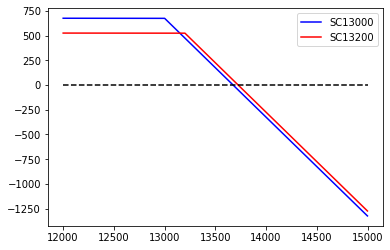

In [3]:
ST = np.arange(12001, 15000)
SC13000 = shortcall(ST, 13000, 675)
SC13200 = shortcall(ST, 13200, 525)
plt.plot(ST, SC13000, 'b-', ST, SC13200, 'r-',[12001, 15000], [0, 0], 'k--')
plt.legend(['SC13000', 'SC13200'])

# Long Put

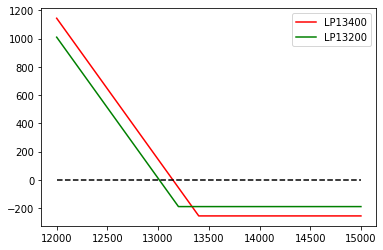

In [4]:
LP13400 = longput(ST, 13400, 255)
LP13200 = longput(ST, 13200, 189)
plt.plot(ST, LP13400, 'r-', ST, LP13200, 'g-', [12001, 15000], [0, 0], 'k--')
plt.legend(['LP13400', 'LP13200'])

# Bear Spread

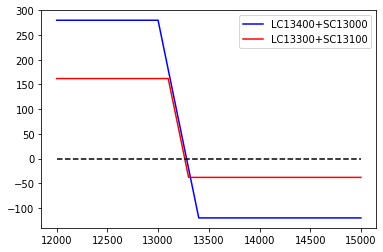

In [5]:
# Spread
LC13400 = longcall(ST, 13400, 395)
SC13000 = shortcall(ST, 13000, 675)
LC13300 = longcall(ST, 13300, 448)
SC13100 = shortcall(ST, 13100, 610)
plt.plot(ST, LC13400+SC13000, 'b-', ST, LC13300+SC13100, 'r-', [12001, 15000], [0, 0], 'k--')
plt.legend(['LC13400+SC13000', 'LC13300+SC13100'])


# 2.

# Butterfly Spread

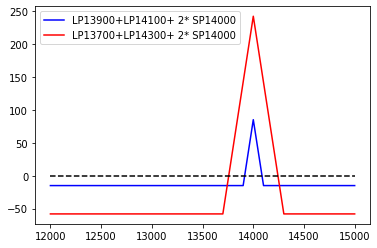

In [13]:
#Butterfly Spread
LP13900 = longput(ST, 13900, 505)
LP14100 = longput(ST, 14100, 640)
SP14000 = shortput(ST, 14000, 565)
LP13700 = longput(ST, 13700, 388)
LP14300 = longput(ST, 14300, 800)
SP14000 = shortput(ST, 14000, 565)
plt.plot(ST, LP13900+LP14100+ 2* SP14000, 'b-', ST, LP13700+LP14300+ 2* SP14000, 'r-' , [12001, 15000], [0, 0], 'k--')
plt.legend(['LP13900+LP14100+ 2* SP14000', 'LP13700+LP14300+ 2* SP14000'])



# Straddle

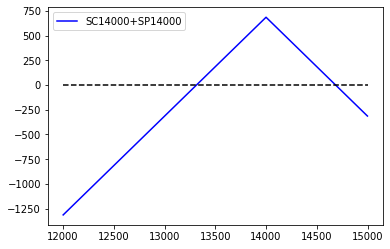

In [14]:
#Straddle
SC14000 = shortcall(ST, 14000, 120)
SP14000 = shortput(ST, 14000, 565)
plt.plot(ST, SC14000+SP14000, 'b-', [12001, 15000], [0, 0], 'k--')
plt.legend(['SC14000+SP14000'])



# Strangle

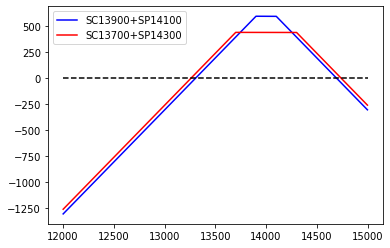

In [20]:
#Strangle
SC13900 = shortcall(ST, 13900, 153)
SP14100 = shortput(ST, 14100, 640)
SC13700 = shortcall(ST, 13700, 238)
SP14300 = shortput(ST, 14300, 800)
plt.plot(ST, SC13900+SP14100, 'b-',ST, SC13700+SP14300, 'r-',  [12001, 15000], [0, 0], 'k--')
plt.legend(['SC13900+SP14100', 'SC13700+SP14300'])